In [1]:
#Sınıflandırmada kullanılan değerlendirme metrikleri
"""
1- Confusion Matrix (Karmaşıklık matrisi)
2- Accuracy
3- Precision
4- Recall
5- Specifity
6- F1-score
7- ROC and AUC
"""

'\n1- Confusion Matrix\n2- Accuracy\n3- Precision\n4- Recall\n5- Specifity\n6- F1-score\n7- ROC and AUC\n'

In [2]:
"""
1 : corona olmuş kişiler
0 : corona olmamış kişiler
"""
#Accuracy : (TN + TP) / (TP + FP + TN + FN)
#Precision : TP / (TP + FP)
#Recall (Sensitivity) : TP / (TP + FN)
#Specifity : TN / (TN + FP) -> Recall'un tam tersi
#F1-Score : 2*(Precision*Recall)/(Precision + Recall)

'\n1 : corona olmuş kişiler\n0 : corona olmamış kişiler\n'

In [3]:
#Destek Vektör Makinaları (Support Vector Machines)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
dataset = pd.read_csv('data/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[66  2]
 [ 8 24]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


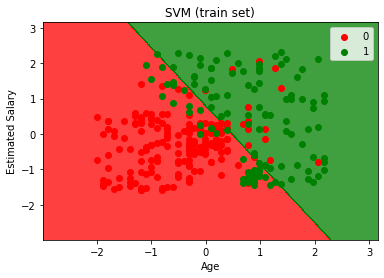

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('SVM (train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


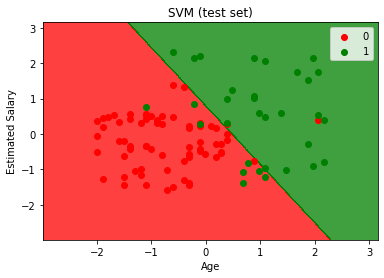

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01), 
                     np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
             plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red','green'))(i), label = j)
plt.title('SVM (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

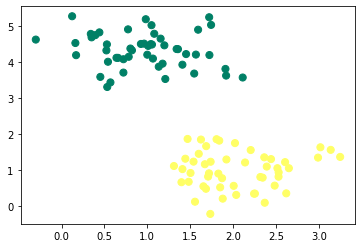

In [28]:
#Ornek-2
from sklearn.datasets import make_blobs
A1, b1 = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.50)
plt.scatter(A1[:, 0], A1[:, 1], c = b1, s = 50, cmap = 'summer')

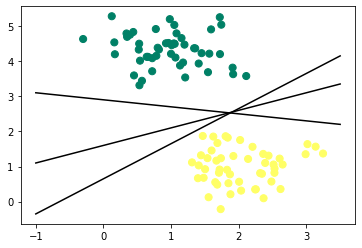

In [45]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = b1, s = 50, cmap = 'summer')
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, 'k')
plt.show()

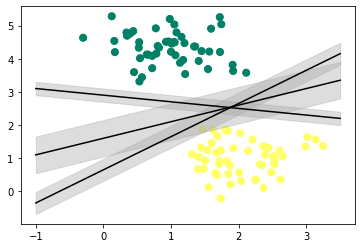

In [44]:
x = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c = b1, s = 50, cmap = 'summer')
for m, b, h in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    y = m * x + b
    plt.plot(x, y, 'k')
    plt.fill_between(x, y + h, y - h, edgecolor = 'none', color = '#AAAAAA', alpha = 0.4)
plt.show()

In [30]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1E10)
model.fit(A1, b1)

SVC(C=10000000000.0, kernel='linear')

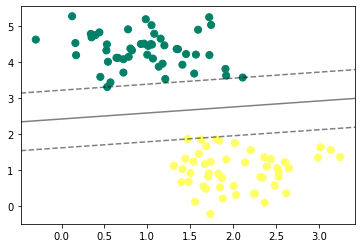

In [39]:
def decision_function(model, ax = None, plot_support = True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    p = np.linspace(xlim[0], xlim[1], 30)
    r = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(r, p)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    M = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, M, colors = 'k', levels = [-1,0,1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s = 300, linewidth = 1, facecolor = 'none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c = b1, s = 50, cmap = 'summer')
decision_function(model)

In [41]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

In [46]:
#K-En Yakın Komşu Algoritması (K-Nearest Neighbors - KNN)
"""
non-parametric
lazy algorithm
"""

In [47]:
#Mesafe metrikleri
"""
1- Euclidean mesafesi (L2 norm) : sqrt((x1-x2)^2 + (y1-y2)^2))
2- Manhattan mesafesi (L1 norm) : |x1 - x2| + |y1 - y2|
3- Minkowski mesafesi (Lp norm) : (|x1-x2|^p + |y1-y2|^p)^(1/p)
4- Hamming mesafesi -> Large ve Medium (1), Large ve Large (0)
"""

'\n1- Euclidean mesafesi (L2 norm) : sqrt((x1-x2)^2 + (y1-y2)^2))\n2- Manhattan mesafesi (L1 norm) : |x1 - x2| + |y1 - y2|\n3- Minkowski mesafesi (Lp norm) : (|x1-x2|^p + |y1-y2|^p)^(1/p)\n4- Hamming mesafesi -> Large ve Medium (1), Large ve Large (0)\n'

In [49]:
data = pd.read_csv('data/data_cleaned.csv')
data.shape

(891, 25)

In [50]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [51]:
x = data.drop(['Survived'], axis = 1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [53]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [54]:
x.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, stratify = y, random_state = 56)

In [62]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [63]:
clf = KNN(n_neighbors = 10, metric = 'euclidean') # K=10

clf.fit(train_x, train_y)

test_predict = clf.predict(test_x)
k_1 = f1_score(test_predict, test_y)

In [64]:
def Elbow(K):
    
    test_error = []
    
    for i in K:
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp, test_y)
        error = 1 - tmp
        test_error.append(error)
    
    return test_error

In [65]:
k = range(6, 30, 2)
test = Elbow(k)

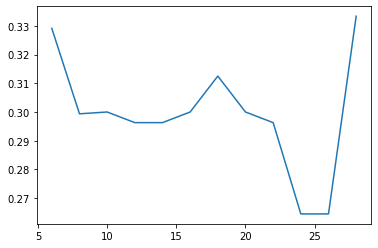

In [66]:
plt.plot(k, test)
plt.show()

In [67]:
clf = KNN(n_neighbors = 27, metric = 'euclidean') # K=10

clf.fit(train_x, train_y)

test_predict = clf.predict(test_x)
k_2 = f1_score(test_predict, test_y)

In [68]:
print("Dirsek öncesi Knn skoru : ", k_1)
print("Dirsek sonrası doğru K değeri ile KNN skoru : ", k_2)

Dirsek öncesi Knn skoru :  0.7000000000000001
Dirsek sonrası doğru K değeri ile KNN skoru :  0.751592356687898
